In [1]:
%matplotlib inline

# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩
crime = pd.read_csv('D:/Data Science/data/crime_in_Seoul.csv', encoding='euc-kr')
crime.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [3]:
# 데이터 확인
crime.shape

(31, 11)

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
관서명      31 non-null object
살인 발생    31 non-null int64
살인 검거    31 non-null int64
강도 발생    31 non-null int64
강도 검거    31 non-null int64
강간 발생    31 non-null int64
강간 검거    31 non-null int64
절도 발생    31 non-null object
절도 검거    31 non-null object
폭력 발생    31 non-null object
폭력 검거    31 non-null object
dtypes: int64(6), object(5)
memory usage: 2.7+ KB


In [5]:
crime.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [6]:
crime.index

RangeIndex(start=0, stop=31, step=1)

In [7]:
# 정량적 데이터의 기초통계분석
crime.describe()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000


In [8]:
crime

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704"
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015"
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227"
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519"
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [9]:
crime_anal_raw = pd.read_csv('D:/Data Science/data/crime_in_Seoul_include_gu_name.csv', encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [10]:
crime_anal_raw.shape

(31, 13)

In [11]:
crime_anal_raw

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [12]:
# 관서별에서 구별로 바꿔서 데이터를 정리
crime_anal_raw = pd.read_csv('D:/Data Science/data/crime_in_Seoul_include_gu_name.csv',
                             encoding='utf-8', index_col = 0)

crime_anal_raw

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [13]:
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


### pandas의 pivot_table

In [14]:
df =pd.read_excel("D:/Data Science/data/02. sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [15]:
pd.pivot_table(df, index=['Name'])
# 숫자 즉 value는 평균을 갖게 된다.

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [16]:
pd.pivot_table(df, index=['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [17]:
# 특정 value만 표시
pd.pivot_table(df, index=['Manager','Rep'], 
              values = ['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [18]:
pd.pivot_table(df, index=['Manager','Rep'], 
              values = ['Price'], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [19]:
pd.pivot_table(df, index=['Manager','Rep', 'Product'], 
              values = ['Price', 'Quantity'], 
               aggfunc = [np.sum, np.mean],
              fill_value = 0)

sum            mean         
                                          Price Quantity  Price Quantity
Manager       Rep           Product                                     
Debra Henley  Craig Booker  CPU           65000        2  32500      1.0
                            Maintenance    5000        2   5000      2.0
                            Software      10000        1  10000      1.0
              Daniel Hilton CPU          105000        4  52500      2.0
                            Software      10000        1  10000      1.0
              John Smith    CPU           35000        1  35000      1.0
                            Maintenance    5000        2   5000      2.0
Fred Anderson Cedric Moss   CPU           95000        3  47500      1.5
                            Maintenance    5000        1   5000      1.0
                            Software      10000        1  10000      1.0
              Wendy Yule    CPU          165000        7  82500      3.5
                            Maintenance    7000        3   7000      3.0
                            Monitor        5000        2   5000      2.0

In [20]:
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723
도봉구,106,102,10,9,3,3,478,1063,1303,1487


In [21]:
# 파생변수 : 5대범죄에 검거율을 계산하여 각 컬럼에 대입
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

# 불필요한 컬럼 제거
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [22]:
col_list = ['강간검거율','강도검거율','살인검거율',
            '절도검거율','폭력검거율']

for c in col_list:
    crime_anal.loc[crime_anal[c] > 100, c] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [23]:
# 피처(특성, 컬럼) 명 변경
crime_anal.rename(columns={'강간 발생':'강간',
                          '강도 발생':'강도',
                          '살인 발생':'살인',
                          '절도 발생':'절도',
                          '폭력 발생':'폭력'}, inplace=True)

crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665
도봉구,102,9,3,1063,1487,100.000000,100.000000,100.000000,44.967074,87.626093


### 정규화(Normalization)
- 데이터의 최소0, 최대1 사이의 비율값을 대체

In [24]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# 정규화 대상 컬럼만 추출
col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))

crime_anal_norm = pd.DataFrame(x_scaled,
                        columns = col, 
                        index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [25]:
# 서울시 CCTV 현황 분석의 결과 파일을 불러와 구별로 가져온 자료중
# 인구수와 소계를 범죄현황 데이터에 포함시키는 작업
result_CCTV = pd.read_csv("D:/Data Science/data/CCTV_result.csv",
                         encoding='utf-8',
                         index_col = '구별')
result_CCTV

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970,425.290264
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536,329.592918
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618


In [26]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [27]:
# 각 범죄의 발생건수를 범죄라는 이름으로 합하는 작업
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [28]:
# 각 범죄의 검거율을 검거라는 이름으로 함하는 작업
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


### Seaborn 라이브러리를 활용한 시각화
- pip install seaborn

In [29]:
import seaborn as sns

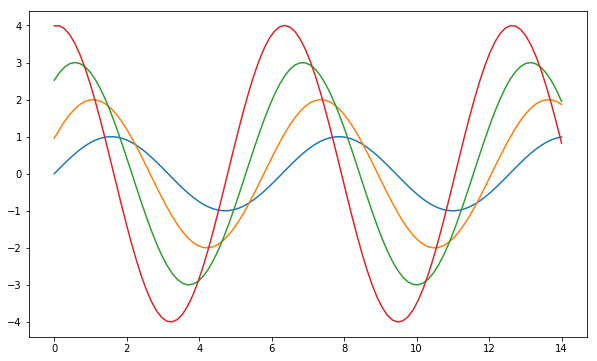

In [30]:
# 데이터 생성
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

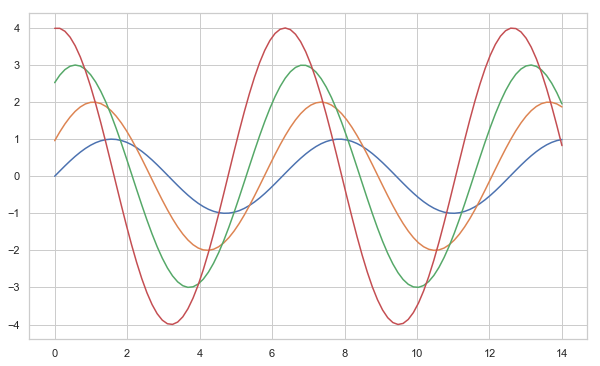

In [31]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

In [32]:
# seaborn 데이터셋을 불러오는 작업
tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


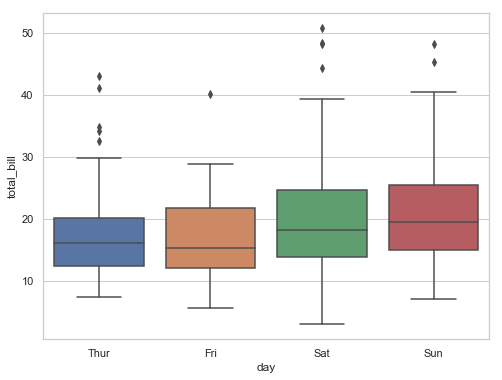

In [33]:
# 요일별 매출현황
plt.figure(figsize=(8, 6))
# boxplot : 상자수염그래프, 이상치를 찾아내는 효과를 가지고 있는 시각화도구
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

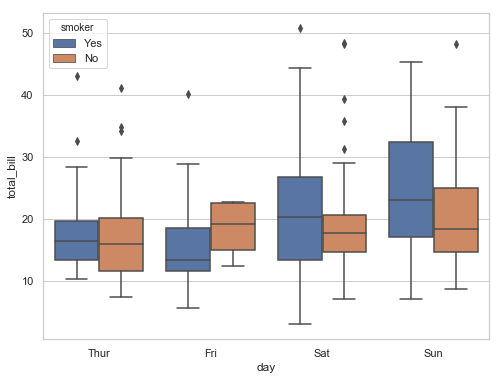

In [34]:
plt.figure(figsize=(8, 6))
# boxplot : 상자수염그래프, 이상치를 찾아내는 효과를 가지고 있는 시각화도구
sns.boxplot(x='day', y='total_bill', hue = 'smoker', data=tips)
plt.show()

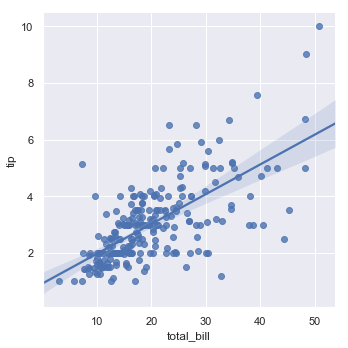

In [35]:
# 상관분석 : 매출금액과 팁
# 선형회귀분석
sns.set(style='darkgrid')
sns.lmplot(x='total_bill', y = 'tip', data = tips)
plt.show()

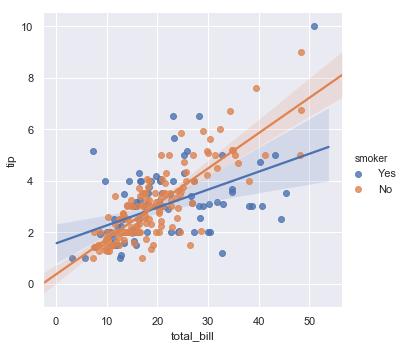

In [36]:
sns.set(style='darkgrid')
sns.lmplot(x='total_bill', y = 'tip', hue = 'smoker', data = tips)
plt.show()

In [37]:
# 연도와 월별 항공기 승객수를 기록한 데이터
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [38]:
flights = flights.pivot('month', 'year', 'passengers')
flights.head(10)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


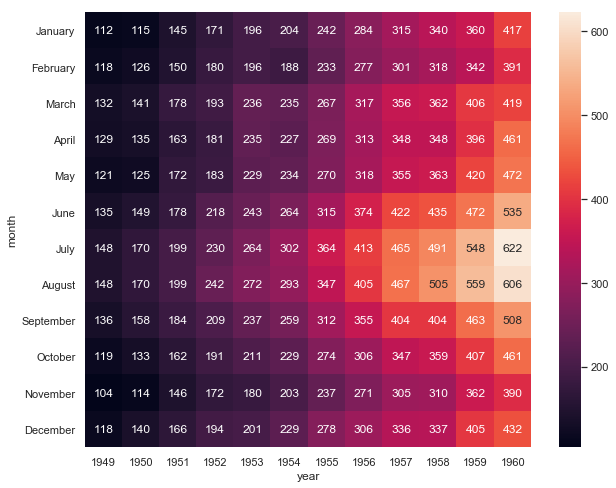

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot = True, fmt='d')
plt.show()

### 범죄현황 분석 시각화

In [40]:
# os별로 한글처리하는 작업
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name =font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown system.....")

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


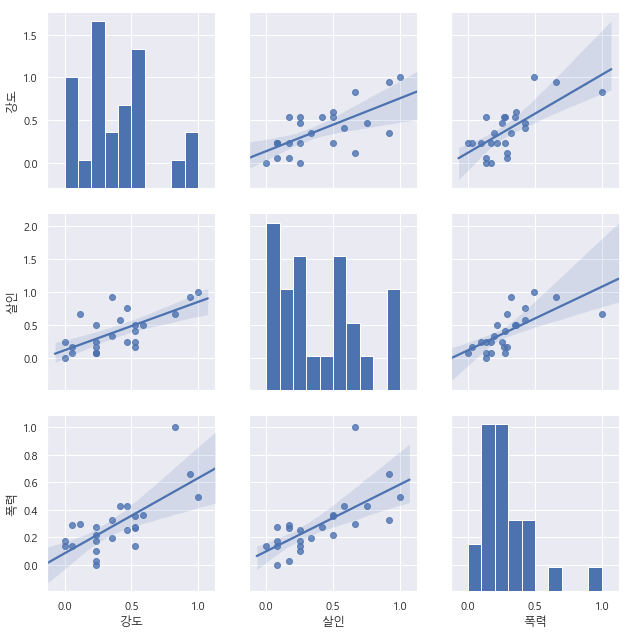

In [41]:
# 산점도 행렬 : 여러개의 컬럼(피처)을 이용하여 산점도 그래프를 그리는 것
# 강도, 살인, 폭력 간의 상관관계를 분석하는 그래프
sns.pairplot(crime_anal_norm,            # 데이터셋
             vars=['강도', '살인','폭력'], # 관측값
            kind = 'reg', size=3)
plt.show()

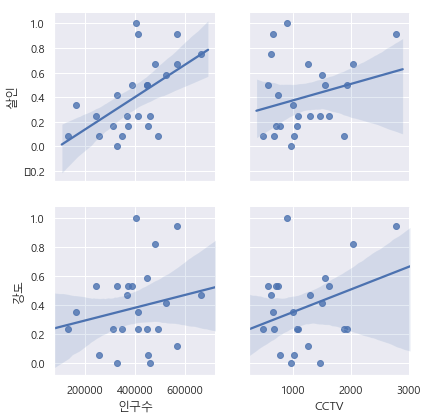

In [42]:
sns.pairplot(crime_anal_norm, 
            x_vars=['인구수', 'CCTV'],
            y_vars=['살인', '강도'],
            kind='reg',
            height=3)
plt.show()

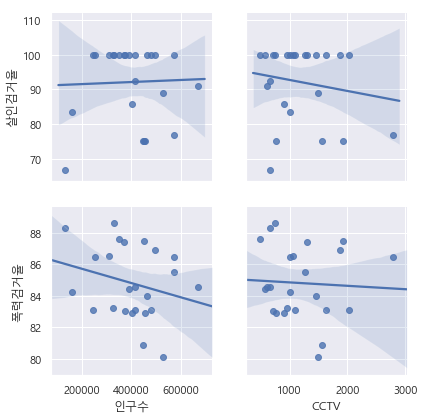

In [44]:
sns.pairplot(crime_anal_norm,
            x_vars=['인구수', 'CCTV'],
            y_vars=['살인검거율','폭력검거율'],
            kind='reg', height=3)
plt.show()

In [45]:
crime_anal_norm.head(10)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


In [46]:
# 검거율의 합을 검거라는 파생변수로 생성했다.
# 검거의 최대값을 100으로 한정하고 그에 따른 정규화작업을 수행
# '검거'의 최대값을 계산
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm.head(10)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,85.463066
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,85.550226
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,94.070728
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,85.212224
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,96.375820
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,75.277906
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,97.997139
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,88.646174
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,100.000000


In [47]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


Text(0.5, 1.0, '범죄 검거 비율(정규화된 검거의 합으로 정렬)')

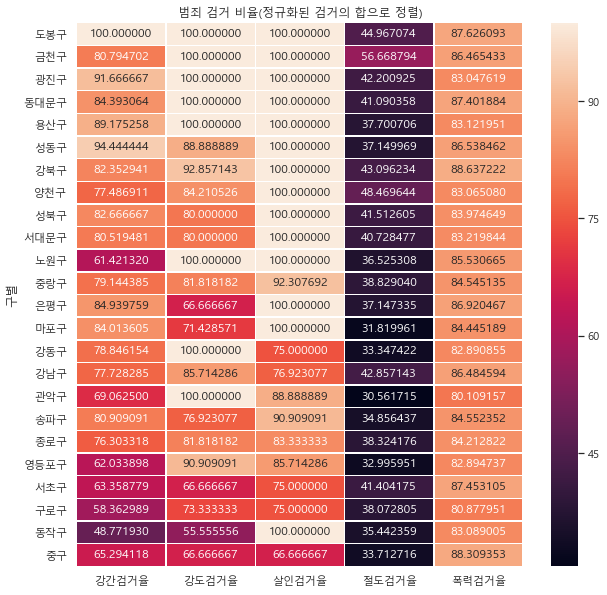

In [48]:
# 시각화대상
col = ['강간검거율', '강도검거율','살인검거율', '절도검거율','폭력검거율']
# 범죄 검거 비율을 시각화하는 작업
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[col],  # 데이터셋
           annot=True,   # 맵 셀에 값 표시여부              
           fmt = 'f',    # 셀에 표시되는 값의 포멧형식(float)
           linewidths=.5)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')

### 지도시각화(Folium-포리움)
- 파이썬에서 제공하는 라이브러리로 지도를 다루는 대표적인 라이브러리
- 외부 : pip install folium
- 로딩 : import folium as g
- 위도와 경도를 이용해서 시각화
1. Map객체
   Map(location=[위도, 경도], zoom_start=10)

In [50]:
import folium as g

In [51]:
# Map객체를 사용해서 location 옵션에 위도, 경도를 설정
# 연돈 : 33.25909, 126.40727
g_map=g.Map(location = [33.25909, 126.40727], zoom_start=18)
g_map

In [52]:
# marker(표식)
marker = g.Marker([33.25909, 126.40727], popup='연돈',
                  icon=g.Icon(color='blue'))
marker.add_to(g_map)
g_map

In [53]:
# 범위를 원형태로 지정하는 작업, CircleMarker
marker2 = g.CircleMarker([33.25909, 126.40727],
                        radius = 100,
                        color = 'skyblue',
                        fill_color = 'skyblue',
                        popup='연돈')
marker2.add_to(g_map)
g_map

In [54]:
# 지도의 스타일 : tiles = ''
# OpenStreetMap, Stamen Terrain, Stamen Toner, Stamen Watercolor
map_osm = g.Map(location=[45.5236, -122.6750])
map_osm

In [56]:
map_osm = g.Map(location=[45.5236, -122.6750], tiles='Stamen Toner')
map_osm

In [57]:
map_osm = g.Map(location=[45.5236, -122.6750], tiles='Stamen Terrain')
map_osm

In [58]:
map_osm = g.Map(location=[45.5236, -122.6750], tiles='Stamen Watercolor')
map_osm

### 서울시 범죄 현황 분석 지도시각화

In [59]:
import json

In [60]:
# 서울시 구별 데이터
geo_path = "D:/Data Science/data/skorea_municipalities_geo_simple.json"

# json 파일 로딩
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [63]:
map = g.Map(location=[37.5502, 126.982],  # 서울시 위도와 경도
           zoom_start = 11,
           tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = crime_anal_norm['살인'],
              columns = [crime_anal_norm.index, crime_anal_norm['살인']],
              fill_color = 'PuRd',
              key_on = 'feature.id')

map